In [1]:
import os
import warnings

import torch
import numpy as np
from torchvision.models import resnet50, ResNet50_Weights

from functions import *

In [2]:
warnings.filterwarnings('ignore')

device: str = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available(): 
    device = 'mps'

x_img_resize: int = 224
y_img_resize: int = 224
img_resize: tuple = (x_img_resize, y_img_resize)

x_figure_size: int = 16
y_figure_size: int = 8
fig_size: tuple = (x_figure_size, y_figure_size)

parametri_grafici = {
    'figure.figsize': fig_size, # Dimensione della figura.
    'figure.autolayout': True,  # Regolazione automatica delle dimensioni della figura.
    'figure.titlesize': 20,     # Dimensione del titolo associato ad ogni figura (plt.suptitle()).
    'axes.titlesize': 20,       # Dimensione del titolo associato ad ogni grafico all'interno di una figura (plt.title()).
    'axes.labelsize': 20,       # Dimensione delle etichette sia sull'asse x sia sull'asse y.
    'xtick.labelsize': 15,      # Dimensione dei riferimenti sull'asse x.
    'ytick.labelsize': 15,      # Dimensione dei riferimenti sull'asse y.
    'legend.fontsize': 20,      # Dimensione dei caratteri della legenda.
}
plt.rcParams.update(parametri_grafici)

In [3]:
working_directory_path: str = os.getcwd()
images_path: str = working_directory_path + '/images'

dataset: list = load_dataset(images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

In [4]:
# Definizione del modello di classificazione ResNet trainato sul dataset ImageNet.
model = resnet50(weights = ResNet50_Weights.IMAGENET1K_V2).eval().to(device) # Lista delle classi: https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

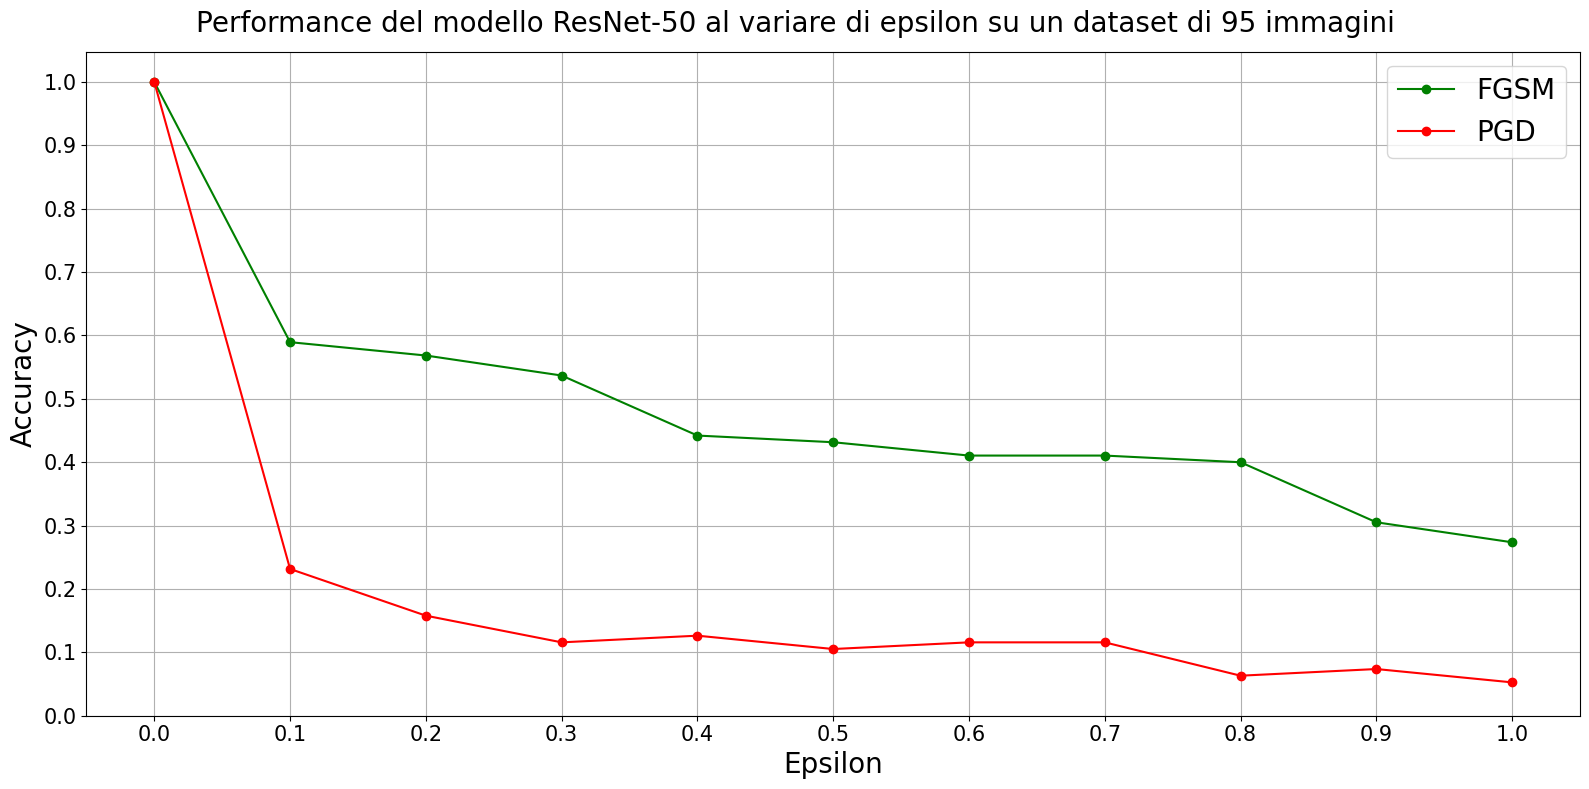

In [5]:
results_path: str = working_directory_path + '/res'
epsilons: list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iters: int = 100
alpha: float = max(epsilons)/iters
    
"""
# Questo frammento di codice ci impiega un'ora per computare interamente, perciò lo eseguo una
# sola volta e salvo gli esiti in due file .txt
    
fgsm_accuracies, fgsm_dict_wrong_preds = compute_performance(dataset, model, device, img_resize, epsilons)
    
file_name = os.path.join(results_path, 'fgsm_accuracies.txt')
with open(file_name, 'w') as file:
    for i, elem in enumerate(fgsm_accuracies):
        string_to_write: str = ''
        if i < len(epsilons) - 1:
            string_to_write = str(elem) + '\n'
        else:
            string_to_write = str(elem)
        file.write(string_to_write)
torch.save(fgsm_dict_wrong_preds, 'res/fgsm_dict_wrong_preds.pth')

pgd_accuracies, pgd_dict_wrong_preds = compute_performance(dataset, model, device, img_resize, epsilons, alpha, iters)
    
file_name = os.path.join(results_path, 'pgd_accuracies.txt')
with open(file_name, 'w') as file:
    for i, elem in enumerate(pgd_accuracies):
        string_to_write: str = ''
        if i < len(epsilons) - 1:
            string_to_write = str(elem) + '\n'
        else:
            string_to_write = str(elem)
        file.write(string_to_write)
torch.save(pgd_dict_wrong_preds, 'res/pgd_dict_wrong_preds.pth')
"""

fgsm_accuracies: list = np.loadtxt('res/fgsm_accuracies.txt', delimiter = ' ')
pgd_accuracies: list = np.loadtxt('res/pgd_accuracies.txt', delimiter = ' ')
accuracies: tuple = (fgsm_accuracies, pgd_accuracies)

fgsm_dict_wrong_preds: dict = torch.load('res/fgsm_dict_wrong_preds.pth')
pgd_dict_wrong_preds: dict = torch.load('res/pgd_dict_wrong_preds.pth')
wrong_preds: tuple = (fgsm_dict_wrong_preds, pgd_dict_wrong_preds)
    
performance_display(dataset, model, epsilons, alpha, accuracies, wrong_preds, show_FGSM_wrong_preds = False, show_PGD_wrong_preds = False)